## Improving the model_Lab 7

In [1]:
# This lab is based on previous labs. It starts in row 43

# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# 0. Read file and standarize columns header

df = pd.read_csv('C:/Users/cprieto/marketing_customer_analysis.csv')
df.columns = df.columns.str.lower()

In [3]:
# Check
df.head(5)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.isnull().any()

customer                         False
state                            False
customer lifetime value          False
response                         False
coverage                         False
education                        False
effective to date                False
employmentstatus                 False
gender                           False
income                           False
location code                    False
marital status                   False
monthly premium auto             False
months since last claim          False
months since policy inception    False
number of open complaints        False
number of policies               False
policy type                      False
policy                           False
renew offer type                 False
sales channel                    False
total claim amount               False
vehicle class                    False
vehicle size                     False
dtype: bool

In [6]:
# 1.  Explore Data
# We check data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

In [7]:
# Check shape

df.shape


(9134, 24)

In [8]:
# We check main features

df.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
# Reorder columns to send "total_claim_amount to the last column
df.columns


Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [10]:
new_cols=['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 
       'vehicle class', 'vehicle size','total claim amount']
df = df[new_cols]

In [11]:
df.head(5)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,total claim amount
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879


In [12]:
# 2. Explore data_Done in previous lab
# df.corr()
# sns.pairplot()
# sns.catplot()
# sns.regplot()
# sns.heatmap

In [15]:
# Preparing data for modelisation
# 3. X-y split (iloc allows us to create "subtables")

X = df.iloc[:,:-1]   # Features are all rows and all columns but the last one. This is a DataFrame object
y = df.iloc[:,-1]    # Target (output) are all rows in last column. This is a Series

In [16]:
# We check

X.head(2)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


In [ ]:
y.head(7)

In [17]:
# We check for numerical and categorical columns

numericals_cols = df.select_dtypes(include='number')
categoricals_cols = df.select_dtypes(include='object')


In [18]:
# Create DataFrame for numerical
numerical = df[['customer lifetime value',
                'income',
                'monthly premium auto',
                'months since last claim',
                'months since policy inception',
                'number of open complaints',
                'number of policies'
                ]]

In [19]:
#Check
numerical.head(5)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [20]:
categoricals = df[['customer',
                'state',
                'response',
                'coverage',
                'education',
                'effective to date',
                'employmentstatus',
                'gender',
                'location code',
                'marital status',
                'policy type',
                'policy',
                'renew offer type',
                'sales channel',
                'vehicle class',                                      
                'vehicle size']]

In [21]:
# Data preparation
# Transform Categtorical values. We use One hot encoding by creating dummy variables

categoricals = pd.get_dummies(categoricals)

In [22]:
categoricals.head(10)

,customer_AA10041,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,...,sales channel_Web,vehicle class_Four-Door Car,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [23]:
categoricals.shape

(9134, 9250)

In [ ]:
# We now Concat both arrays (numerical and Categorical).

In [24]:
X =  pd.concat([numerical,categoricals],axis=1)

In [25]:
X.head(5)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,customer_AA10041,customer_AA11235,customer_AA16582,...,sales channel_Web,vehicle class_Four-Door Car,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small
0,2763.519279,56274,69,32,5,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,6979.535903,0,94,13,42,0,8,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,7645.861827,0,106,18,65,0,7,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [26]:
X.shape

(9134, 9257)

In [27]:
y.tail

<bound method NDFrame.tail of 0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total claim amount, Length: 9134, dtype: float64>

In [28]:
# Division of Dataset into trains and test set. We take 20% for the test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)


In [29]:
# we check
print(len(X_train),len(X_test),len(y_train),len(y_test))

7307 1827 7307 1827


In [30]:
# Standarization of explanatory variables
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()   # This is the class

In [31]:
X_train= sc_X.fit_transform(X_train)  # This method actually fits the data and transform the values so they´re now N(0,1). 
                                          # iMPORTANT: Output is a numpy array

X_test =sc_X.transform(X_test)

In [32]:
X_train

array([[ 0.86624454, -1.23743619,  0.25280178, ...,  2.93719951,
        -1.54112223, -0.48812365],
       [ 0.01155707, -0.1843032 , -0.66770282, ..., -0.34046036,
        -1.54112223,  2.04866122],
       [-0.73541277, -1.23743619, -0.43757667, ..., -0.34046036,
         0.6488778 , -0.48812365],
       ...,
       [ 0.00886377, -0.23120266, -0.69646859, ..., -0.34046036,
         0.6488778 , -0.48812365],
       [ 0.69705975, -0.32385047,  0.45416216, ...,  2.93719951,
        -1.54112223, -0.48812365],
       [-0.05580937,  0.74194472,  3.04308135, ..., -0.34046036,
         0.6488778 , -0.48812365]])

In [33]:
X_test

array([[-0.35343372,  0.80920236, -0.66770282, ..., -0.34046036,
         0.6488778 , -0.48812365],
       [-0.82393679, -1.23743619, -0.72523436, ..., -0.34046036,
         0.6488778 , -0.48812365],
       [ 0.21379318,  0.51721539,  0.74181985, ..., -0.34046036,
        -1.54112223,  2.04866122],
       ...,
       [-0.57982542, -1.23743619,  0.5116937 , ...,  2.93719951,
        -1.54112223, -0.48812365],
       [-0.41564969, -1.23743619, -0.55263974, ..., -0.34046036,
         0.6488778 , -0.48812365],
       [ 0.06296676,  0.80417037, -0.63893705, ..., -0.34046036,
         0.6488778 , -0.48812365]])

In [ ]:
# 5. Linear Regression

In [34]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [35]:
# Coefficients of Linear Regression

regressor.coef_

array([ 11.02571578, -15.1526609 ,  54.25954231, ...,   0.22621876,
        -4.28165163,   4.54242838])

### Performance Evaluation

In [36]:
#Verifying overfitting

print(" Score of Train : {}\n Score of Test : {}".format(regressor.score(X_train, y_train), regressor.score(X_test, y_test)))

 Score of Train : 1.0
 Score of Test : 0.6697877954572893


In [ ]:
# Train and test are very different, there is overfitting

In [ ]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [37]:
# Model Validation

## evaluating sklearn's LR model in all dataset 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("r2_train:",r2_train)
print("r2_test:",r2_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("rmse_train:", rmse_train)
print("rmse_test:", rmse_test)



r2_train: 1.0
r2_test: 0.6697877954572893
rmse_train: 2.111751042046768e-12
rmse_test: 167.47329347893492


## Lab 7 - Improving accuracy of the model


In [38]:
# Using the concept of multicollinearity to remove insignificant variables
numerical2 = numerical
numerical2.corr()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000


In [ ]:
# It seems there is no high correlation among features

In [39]:
numerical2.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies'],
      dtype='object')

array([[<AxesSubplot:title={'center':'customer lifetime value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly premium auto'}>],
       [<AxesSubplot:title={'center':'months since last claim'}>,
        <AxesSubplot:title={'center':'months since policy inception'}>,
        <AxesSubplot:title={'center':'number of open complaints'}>],
       [<AxesSubplot:title={'center':'number of policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

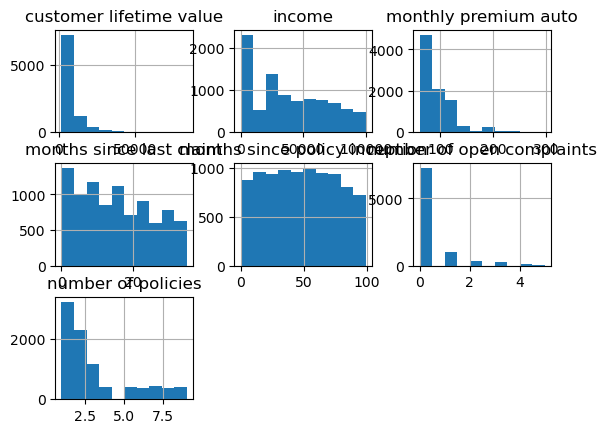

In [40]:
# Lets look the distributions for numerical values
numerical2.hist()


In [41]:
# Lets drop those with extreme skewness ("customer lifetime value","number of open complaints","number of policies")

numerical2.drop(["customer lifetime value", "number of open complaints", "number of policies"], axis=1, inplace=True)


C:\Users\cprieto\AppData\Local\Temp\ipykernel_13624\325433001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical2.drop(["customer lifetime value", "number of open complaints", "number of policies"], axis=1, inplace=True)


In [42]:
numerical2.head(10)

,income,monthly premium auto,months since last claim,months since policy inception
0,56274,69,32,5
1,0,94,13,42
2,48767,108,18,38
3,0,106,18,65
4,43836,73,12,44
5,62902,69,14,94
6,55350,67,0,13
7,0,101,0,68
8,14072,71,13,3
9,28812,93,17,7


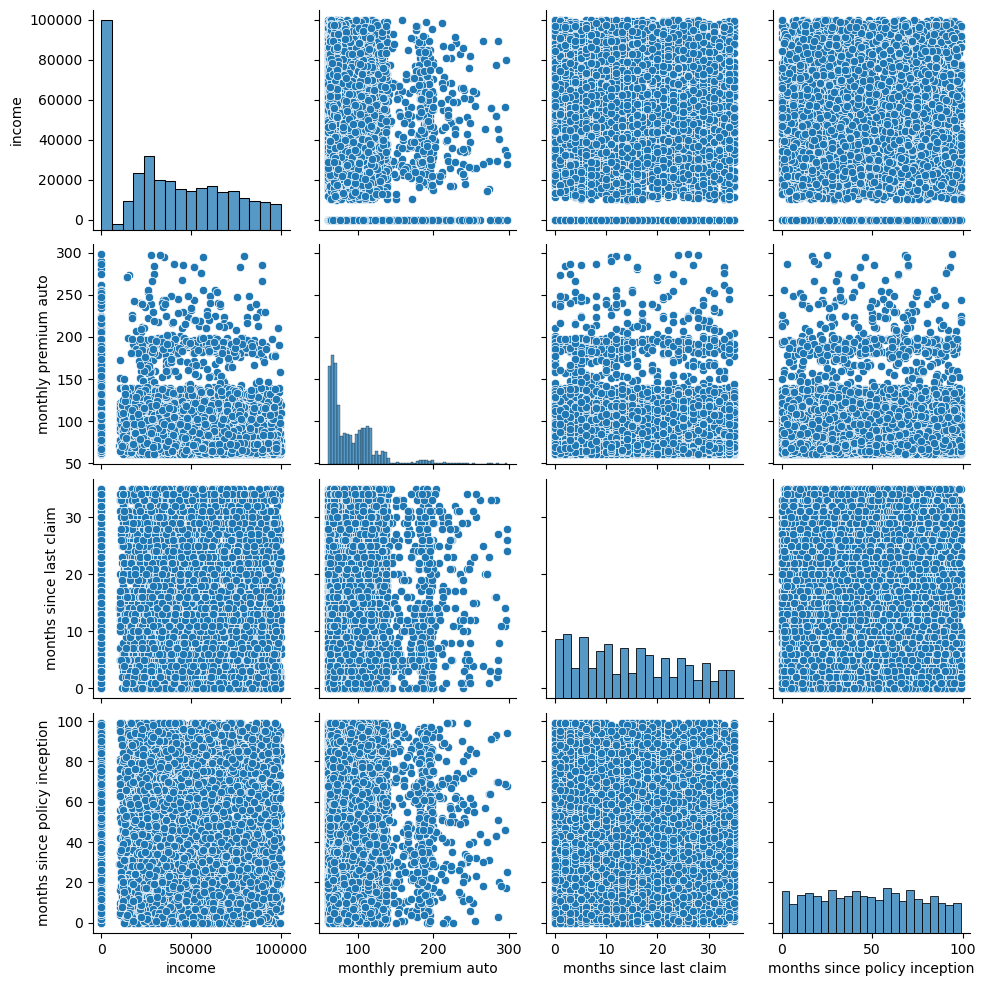

In [43]:
# Let see this visually
sns.pairplot(numerical2)

In [ ]:
# We see nothing here.

In [44]:
# Lets go now with categorical values
categoricals2 = categoricals
categoricals2 = df.select_dtypes(include='object')
categoricals2.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size'],
      dtype='object')

In [45]:
# Lets go now with categorical values. Drop features that seem insignificant
categoricals2.drop(["customer", "response", "effective to date","renew offer type",'sales channel'], axis=1, inplace=True)
categoricals2.head()


,state,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,vehicle class,vehicle size
0,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Two-Door Car,Medsize
1,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Four-Door Car,Medsize
2,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Two-Door Car,Medsize
3,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,SUV,Medsize
4,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Four-Door Car,Medsize


In [74]:
# Lets encode this

categoricals2 = df[['state',
                'coverage',
                'education',
                'employmentstatus',
                'gender',
                'location code',
                'marital status',
                'policy type',
                'policy',
                'vehicle class',                                      
                'vehicle size']]

In [75]:
categoricals2.head(5)

,state,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,vehicle class,vehicle size
0,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Two-Door Car,Medsize
1,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Four-Door Car,Medsize
2,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Two-Door Car,Medsize
3,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,SUV,Medsize
4,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Four-Door Car,Medsize


In [76]:
# Transform Categtorical values. We use One hot encoding by creating dummy variables

categoricals2 = pd.get_dummies(categoricals2)

In [77]:
categoricals2.head(5)

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,...,policy_Special L3,vehicle class_Four-Door Car,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small
0,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [78]:
# We now concat numericals and categoricals
X2 =  pd.concat([numerical,categoricals2],axis=1)
X2.shape

(9134, 51)

In [79]:
X2.head(5)

,income,monthly premium auto,months since last claim,months since policy inception,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,coverage_Basic,...,policy_Special L3,vehicle class_Four-Door Car,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small
0,56274,69,32,5,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
1,0,94,13,42,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,48767,108,18,38,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,106,18,65,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,43836,73,12,44,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0


In [80]:
X2.shape

(9134, 51)

In [81]:
y.shape

(9134,)

In [82]:
# Division of Dataset into trains and test set. We take 30% for the test now 
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y,test_size = 0.3,random_state=0)


In [83]:
# Standarization of explanatory variables. We now use Min-Max scaler
from sklearn.preprocessing import MinMaxScaler
scaler_X=MinMaxScaler()   # This is the class

In [84]:
X_train2= scaler_X.fit_transform(X_train2)  #  
                                          # iMPORTANT: Output is a numpy array

X_test2 =scaler_X.transform(X_test2)

In [85]:
X_train2

array([[0.25758046, 0.12288136, 0.25714286, ..., 0.        , 1.        ,
        0.        ],
       [0.45348686, 0.16525424, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.21508388, 0.22881356, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.30606937, 0.03389831, 0.62857143, ..., 0.        , 1.        ,
        0.        ],
       [0.27788838, 0.20338983, 0.85714286, ..., 1.        , 0.        ,
        0.        ],
       [0.60207481, 0.58474576, 0.2       , ..., 0.        , 1.        ,
        0.        ]])

In [87]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train2,y_train2)

LinearRegression()

In [62]:
# Coefficients of Linear Regression

regressor.coef_

array([  3.15482765, -22.34270536, 990.74181348, ..., -12.70044954,
       -26.14012119, -17.51492914])

In [88]:
#Verifying overfitting

print(" Score of Train : {}\n Score of Test : {}".format(regressor.score(X_train2, y_train2), regressor.score(X_test2, y_test2)))

 Score of Train : 0.7620669365048219
 Score of Test : 0.7510122510719459


In [ ]:
# This show no overfitting

In [ ]:
# Model Validation

## evaluating sklearn's LR model in all dataset 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


predictions = regressor.predict(X) # predict some values

rmse = mean_squared_error(y, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y, predictions)
# r2 gives you an overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse is good to see if the errors are big, the values returned are in the same unit as the target
print("R2_score:", round(regressor.score(X,y),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)
print("MAE:", mae)




In [94]:
y_train2_pred = regressor.predict(X_train2)
y_test2_pred = regressor.predict(X_test2)

r2_train_2 = r2_score(y_train2, y_train2_pred)
r2_test_2 = r2_score(y_test2, y_test2_pred)
print("r2_train2:", r2_train_2.round(2))
print("r2_test2:", r2_test_2.round(2))


r2_train2: 0.76
r2_test2: 0.75


In [95]:
rmse_train_2 = np.sqrt(mean_squared_error(y_train2, y_train2_pred)).round(2)
rmse_test_2 = np.sqrt(mean_squared_error(y_test2, y_test2_pred)).round(2)
print("rmse2_train2:", rmse_train_2.round(2))
print("rmse2_test2::", rmse_test_2.round(2))

rmse2_train2: 141.76
rmse2_test2:: 144.75


In [ ]:
# Check Improvement

In [104]:
if (r2_test_2 -r2_test) > 0 :
    print(r2_test_2 -r2_test,"Model has improved")
else:
     print("Model has not improved")  

0.08122445561465663 Model has improved
